Import all the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import keras
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

from keras.callbacks import EarlyStopping,ModelCheckpoint

**Get the Data and preprocess it**

In [11]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape, y_train.shape, X_train.shape, y_test.shape

((60000, 28, 28), (60000,), (60000, 28, 28), (10000,))

In [12]:
def plot_mnist(i:str)->None:
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

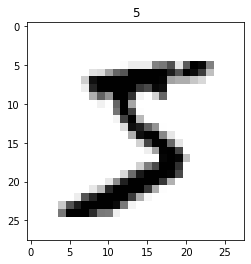

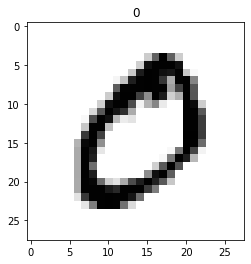

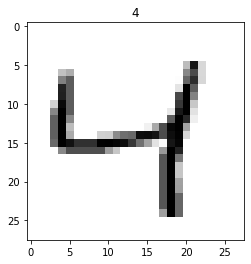

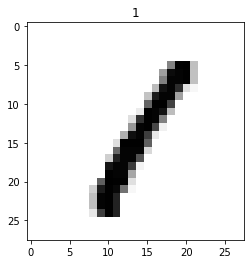

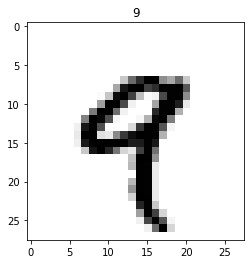

In [13]:
for i in range(5):
    plot_mnist(i)

In [14]:
#pre processing the images

#Normalizing the image to [0,1] range
X_test=X_test.astype(np.float32)/255
X_train=X_train.astype(np.float32)/255

#expand the dimesions of image to (28,28,1)
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

#converting classes to one hot vectors
y_test=to_categorical(y_test)
y_train=to_categorical(y_train)

In [15]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape = (28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.15))

model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [14]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [16]:
#callback
es=EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)

mc=ModelCheckpoint(filepath='./model.h5',monitor='val_acc',verbose=1,save_best_only=True)

cb=[es,mc]

***MODEL TRAINING***

In [18]:
his=model.fit(X_train,y_train,epochs=50,validation_split=0.3,callbacks=cb)

Epoch 1/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0715 - val_accuracy: 0.9894
Epoch 2/50
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0852 - val_accuracy: 0.9894
Epoch 3/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0669 - val_accuracy: 0.9899
Epoch 4/50
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0712 - val_accuracy: 0.9896
Epoch 5/50
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0703 - val_accuracy: 0.9901
Epoch 6/50
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0762 - val_accuracy: 0.9897
Epoch 7/50
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0732 -

In [25]:
#model saved as h5
model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [16]:
saved_model=keras.models.load_model('model')

In [17]:
#score_m = model.evaluate(X_test,y_test)
score_s = saved_model.evaluate(X_test,y_test)
print(f"the accuracy of 1st is {score_s[1]} and accuracy of 2nd is {score_s[1]}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0810 - accuracy: 0.9907
the accuracy of 1st is 0.9907000064849854 and accuracy of 2nd is 0.9907000064849854
